In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [144]:
df = pd.read_csv("cleaned_hiv_aids_data.csv")
df = df.dropna(subset=['HIV_AIDS_Deaths'])
df_2005 = df[df['Year'] == 2005]

In [145]:
df_2005 = df[df['Year'] == 2005]

In [146]:
clustering_data = df_2005[['HIV_AIDS_Deaths']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


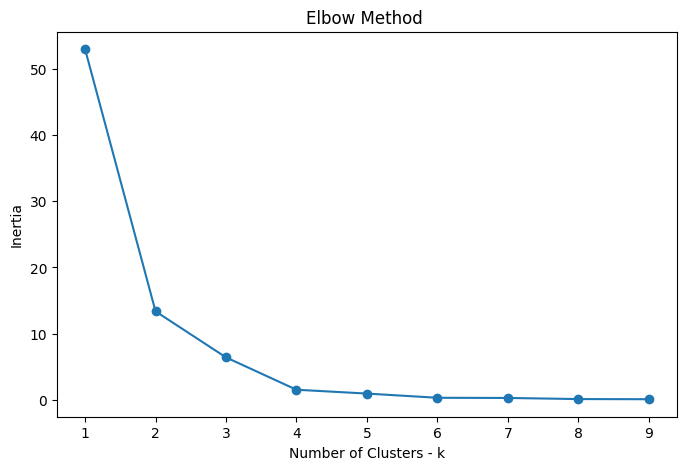

In [147]:
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters - k')
plt.ylabel('Inertia')
plt.title('Elbow Method ')
plt.show()

In [148]:
clustering_data = df_2005[['Country', 'HIV_AIDS_Deaths']]

clustering_data['class'] = pd.qcut(clustering_data['HIV_AIDS_Deaths'], 4, labels=[1, 2, 3, 4])

africa_map = gpd.read_file('africa-outline-with-countries_6.geojson')

clustered_data_geo = africa_map.merge(clustering_data, left_on='name', right_on='Country', how='inner')


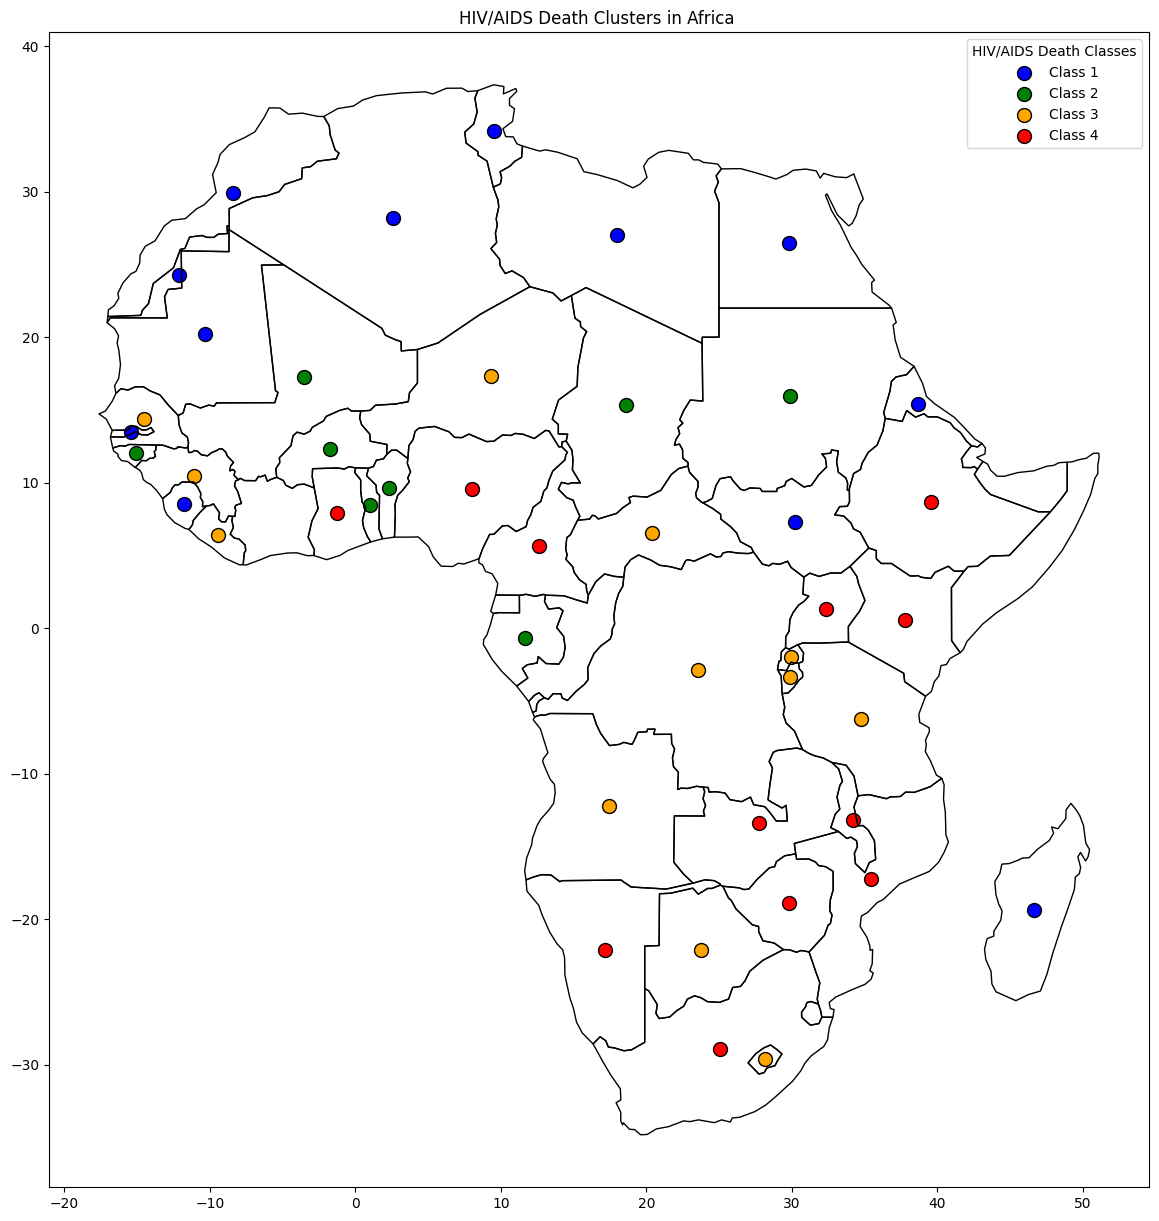

class
1    19
4    13
3    12
2     9
Name: count, dtype: int64


In [ ]:

def get_centroid(geometry):
    return geometry.centroid

africa_map['centroid'] = africa_map['geometry'].apply(get_centroid)

africa_map['class'] = africa_map['name'].map(clustering_data.set_index('Country')['class'])

colors = {1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}

fig, ax = plt.subplots(figsize=(15, 15))

africa_map.boundary.plot(ax=ax, linewidth=1, color="black")

for class_id, color in colors.items():
    class_data = africa_map[africa_map['class'] == class_id]
    ax.scatter(class_data['centroid'].x, class_data['centroid'].y, 
               color=color, s=100, label=f'Class {class_id}', edgecolor='black', marker='o')

plt.legend(title='HIV/AIDS Death Classes')
plt.title('HIV/AIDS Death Clusters in Africa ')
plt.show()

class_counts = clustering_data['class'].value_counts()
print(class_counts)
